# SD-TSIA 214 - Text segmentation using Hidden Markov Models

**Author: José Lucas Barretto**

### Loading E-Mail Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from visualize_segmentation import visualize_segmentation

In [2]:
# load file list
file_list = np.loadtxt('dat/mail.lst', dtype='str')

# load dataset
data = {}
for file in file_list:
    data[file[:-4]] = list(np.loadtxt(f'dat/{file}', dtype='int'))

### Loading and Visualizing Distributions

#### Q1) Give the value of the $\pi$ vector of the initial probabilities.

Since our sequence of observations consists of sequential characters of an email, then the initial state is always, necessarily the header. For this reason, $\pi = [1, 0]$, indicating that there is a 100% probability that the initial hidden state is the header.

#### Q2) What is the probability to move from state 1 to state 2? What is the probability to remain in state 2? What is the lower/higher probability?

The probability to move from state 1 to state 2 (moving from the header to the body) is the entry $a_{12}$ of matrix $A$, which is $0.00078$. The probability to remain in state 2 is the entry $a_{22}$ which equals 1, because if we consider the sequential order of an email, it is impossible to go back to the header once you've reached the body. The lowest probability is the probability of moving from state 2 to state 1, which is equivalent to moving from the body to the header. As stated, this is impossible considering the sequential order of an email, and thus this probability is 0.

#### Q3) What is the size of B ?
B is called the emission probability matrix, and it stores the probability of observing each possible character in the two possible states. For this reason, it has size (number of characters) x (number of states), which in our case is 252 x 2.

In [3]:
A = np.array([[0.999218078035812, 0.00078192964187974], [0,1]])
B = np.loadtxt('PerlScriptAndModel/P.text')
pi = np.array([1, 0])

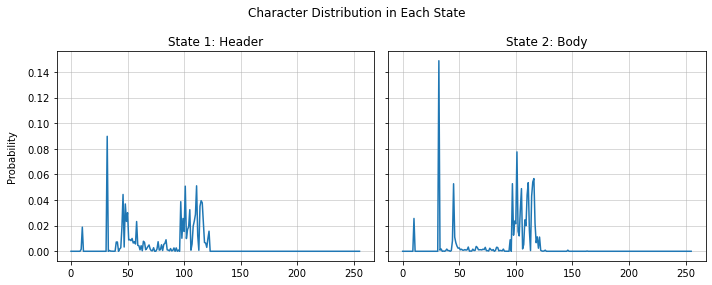

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,4))

ax1.set_ylabel('Probability', labelpad=10)
ax1.set_title('State 1: Header')
ax1.plot(B[:,0])
ax1.grid(alpha=0.6)

ax2.set_title('State 2: Body')
ax2.plot(B[:,1])
ax2.grid(alpha=0.6)

fig.suptitle('Character Distribution in Each State')
plt.tight_layout()
plt.show()

### Coding the Viterbi Algorithm

In [5]:
def viterbi(obs, A, B, pi):
    
    # get model params
    Q = A.shape[0]
    T = len(obs)
    
    # apply log to all params
    with np.errstate(divide='ignore'):
        A = np.log(A)
        B = np.log(B)
        pi = np.log(pi)

    # initialize empty delta matrix
    delta = np.zeros((Q, T))
    phi = np.zeros((Q, T), dtype='int')
    q = np.zeros(T, dtype='int')
    
    # initialize first column of delta matrix
    for i in range(Q):
        delta[i,0] = B[obs[0], i] + pi[i]
    
    # recursively calculate delta and save best path
    for t in range(T-1):
        for j in range(Q):

            delta[j, t+1] = B[obs[t+1],j] + np.max(A[:,j] + delta[:, t])
            phi[j, t+1] = np.argmax(A[:,j] + delta[:, t])
    
    # obtain best probability
    prob = np.max(delta[:,-1])
    
    # backtrack to find best sequence
    q[-1] = np.argmax(delta[:,-1])
    for t in range(T-2, -1, -1):
        q[t] = phi[q[t+1], t+1]
    
    return q

### Visualizing Segmentations

#### Q4) Print the track and present and discuss the results obtained on mail11.txt to mail30.txt.

In [11]:
# test for mail11
obs = data['mail11']
q = viterbi(obs, A, B, pi)

visualize_segmentation('dat/mail11.txt', 'mail11_segmented.txt', q)

mail11 = open('mail11_segmented.txt', 'r')
print(mail11.read())

From spamassassin-devel-admin@lists.sourceforge.net  Thu Aug 22 15:25:29 2002
Return-Path: <spamassassin-devel-admin@example.sourceforge.net>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id AE2D043F9B
	for <zzzz@localhost>; Thu, 22 Aug 2002 10:25:29 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 15:25:29 +0100 (IST)
Received: from usw-sf-list2.sourceforge.net (usw-sf-fw2.sourceforge.net
    [216.136.171.252]) by dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id
    g7MENlZ09984 for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 15:23:47 +0100
Received: from usw-sf-list1-b.sourceforge.net ([10.3.1.13]
    helo=usw-sf-list1.sourceforge.net) by usw-sf-list2.sourceforge.net with
    esmtp (Exim 3.31-VA-mm2 #1 (Debian)) id 17hsof-00042r-00; Thu,
    22 Aug 2002 07:20:05 -0700
Received: from vivi.upti

In [13]:
# test for mail30
obs = data['mail30']
q = viterbi(obs, A, B, pi)

visualize_segmentation('dat/mail30.txt', 'mail30_segmented.txt', q)

mail30 = open('mail30_segmented.txt', 'r')
print(mail30.read())

From ilug-admin@linux.ie  Fri Aug 23 11:07:51 2002
Return-Path: <ilug-admin@linux.ie>
Delivered-To: zzzz@localhost.netnoteinc.com
Received: from localhost (localhost [127.0.0.1])
	by phobos.labs.netnoteinc.com (Postfix) with ESMTP id 7419C4416C
	for <zzzz@localhost>; Fri, 23 Aug 2002 06:06:33 -0400 (EDT)
Received: from phobos [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for zzzz@localhost (single-drop); Fri, 23 Aug 2002 11:06:33 +0100 (IST)
Received: from lugh.tuatha.org (root@lugh.tuatha.org [194.125.145.45]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g7MJtgZ22471 for
    <zzzz-ilug@spamassassin.taint.org>; Thu, 22 Aug 2002 20:55:42 +0100
Received: from lugh (root@localhost [127.0.0.1]) by lugh.tuatha.org
    (8.9.3/8.9.3) with ESMTP id UAA19436; Thu, 22 Aug 2002 20:53:00 +0100
X-Authentication-Warning: lugh.tuatha.org: Host root@localhost [127.0.0.1]
    claimed to be lugh
Received: from mail02.svc.cra.dublin.eircom.net
    (mail02.svc.cra.dublin.eircom.net [1

We can see that in mail11, the cutoff is made correctly between the header and the body. In mail30, however, this is not true. This may have happened because mail30 is a response that contains the previous conversation, and for this reason, it contains some "mini-headers" inside its content.

#### Q5) How would you model the problem if you had to segment the mails in more than two parts (for example : header, body, signature)?

To account for more than two parts of an email, we should include more states to the HMM model. In this case, we would not have only the two states (header and body), but instead, multiple possible states (e.g.: header, body, signature, etc.). To do this, it would be necessary to recalculate the matrices A and B. Matrix A needs to include all the transition probabilities between different sections of the email, and matrix B would have to include the probability of observing each character in the newly added sections.

#### Q6) How would you model the problem of separating the portions of mail included, knowing that they always start with the character ">".

To correctly separate portions of mail included, we can define two new states: one state for portions of mail included, and one state that represents the start of a portion of mail. This last state, which indicates that there's an included portion of mail to come, has emission probabilities equal to 0 for all characters, except for ">", which has emission probability of 1. The probability of transitioning from the state *start of a portion of mail* to the other states are: 1, if the state of destination is *portion of mail* and 0 to all other states. This way, we would correctly account for the fact that every portion of mail starts with the character ">".

Observations:
- This model still allows other sections to start with the character ">", it just accounts for the fact that every included portion of mail starts with ">".
- Adding these new states to the model would require including transition probabilities between the new states and the other ones (and vice-versa), as well as emission probabilities for the *portion of email* state.